**Nonlinear models:**

In this session mon-linear models such as Support Vector Machine, K-Nearest Neighbors, and Decision Tree models for Classification and Regression tasks will be presented. You can find the datasets here: [nasa.csv ](https://drive.google.com/file/d/1JPUOwwIuFbyIWPNyMCWj78S-CIuqb75d/view?usp=sharing) , and [life expectancy](https://drive.google.com/file/d/1JbIYKkp6N4C16ixcEe7zDQ536ksYr7Wr/view?usp=sharing)..

Import Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
Forecasting_data = pd.read_csv("/content/life_dexpectency.csv")
Forecasting_data.dropna(inplace=True)

X = Forecasting_data.iloc[:, 4:]
y = Forecasting_data.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

X_train.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1438,217.0,60,4.21,155.476762,88.0,341,21.6,78,91.0,4.50,91.0,0.1,1919.466195,9751864.0,1.0,9.7,0.655,11.5
687,128.0,1,7.17,151.762567,89.0,56,5.5,1,9.0,8.99,92.0,0.1,3174.949100,43.0,2.6,2.8,0.735,13.1
711,95.0,3,12.91,4238.540035,84.0,0,55.1,4,94.0,1.10,9.0,0.1,23718.746700,8221158.0,1.2,1.2,0.855,16.2
401,9.0,2,7.39,209.487587,92.0,0,58.7,2,95.0,6.35,96.0,0.1,1526.877460,16491687.0,0.9,0.9,0.797,14.8
1201,17.0,0,0.01,726.029176,87.0,0,61.3,0,91.0,6.42,91.0,0.1,7378.345289,62181.0,1.8,1.9,0.803,15.1


In [ ]:
classification_data = pd.read_csv("/content/nasa.csv")

X_c = classification_data.drop(["Name", "Hazardous"], axis = 1)
y_c = classification_data["Hazardous"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size = 0.2, random_state = 123)
print(f"Shape of X_train: {X_train_c.shape}")

Shape of X_train: (369, 25)


## K-Nearest Neigborhood
Documentation for KNN is available [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors).

KNN for Classification:

In [ ]:
from sklearn import neighbors

n_neighbors = 5
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', metric='minkowski') # Sandard Euclidean distance

knn.fit(X_train_c, y_train_c)
probs = knn.predict_proba(X_test_c)
probs[:10]

array([[1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6]])

Accuracy with knn model: 0.6451612903225806
Confusion matrix with knn model: 
              precision    recall  f1-score   support

           0       0.58      0.81      0.67        42
           1       0.76      0.51      0.61        51

    accuracy                           0.65        93
   macro avg       0.67      0.66      0.64        93
weighted avg       0.68      0.65      0.64        93



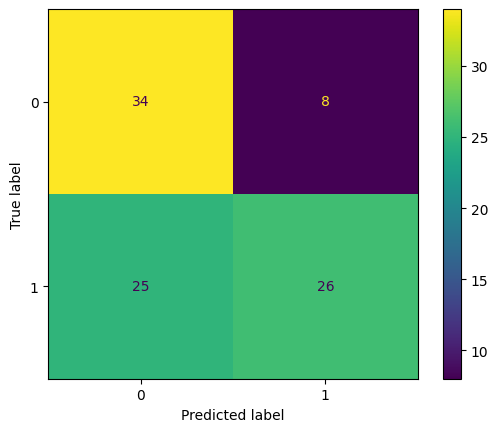

In [ ]:
y_pred_c = knn.predict(X_test_c)
acc_knn = knn.score(X_test_c, y_test_c)
print(f"Accuracy with knn model: {acc_knn}")

confusion = metrics.confusion_matrix(y_test_c, y_pred_c)
print("Confusion matrix with knn model: ")

metrics.ConfusionMatrixDisplay.from_predictions(y_test_c, y_pred_c)

print(metrics.classification_report(y_test_c, y_pred_c))

In [ ]:
# Find the K-neighbors of a point.
X0 = X_test_c.iloc[0:2]
neigh_dist, neigh_ind = knn.kneighbors(X0, n_neighbors, return_distance =True)
print(neigh_ind)
neigh_dist

[[281 203 353  94 248]
 [333 362  15 132 121]]


array([[1.00000000e+09, 1.00000001e+09, 2.00000000e+09, 2.00000000e+09,
        2.00000001e+09],
       [9.19549719e+04, 4.75841683e+05, 1.00000004e+09, 1.00000008e+09,
        1.00000026e+09]])

KNN for regression (forecasting):

In [ ]:
knn_r = neighbors.KNeighborsRegressor(n_neighbors)
knn_r.fit(X_train, y_train)
y_pred = knn_r.predict(X_test)

mse_knn = metrics.mean_squared_error(y_test, y_pred)
mape_knn = metrics.mean_absolute_percentage_error(y_test, y_pred)

print(f"MSE with KNN regression model: {mse_knn}")
print(f"MAPE with KNN regression model: {mape_knn}")

MSE with KNN regression model: 75.61600101265822
MAPE with KNN regression model: 0.103526639209308


## Support Vector Machines (SVM)

SVM documentions are available [here](https://scikit-learn.org/stable/modules/svm.html).

Support Vector Regression (SVR):
Formulation are [here](https://scikit-learn.org/stable/modules/svm.html#svr).

In [ ]:
from sklearn import svm

svr = svm.SVR(kernel ='rbf') # kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
svr_p = svm.SVR(kernel ='poly', degree=3, C=1.5)
svr.fit(X_train, y_train)
svr_p.fit(X_train, y_train)

print(f"Number of support vectors with rbf kernel: {svr.n_support_}")
print(f"Number of support vectors with polynomial kernel: {svr_p.n_support_}")

Number of support vectors with rbf kernel: [1166]
Number of support vectors with polynomial kernel: [1169]


In [ ]:
y_pred = svr.predict(X_test)
y_pred_p = svr_p.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
mse_p = metrics.mean_squared_error(y_test, y_pred_p)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
mape_p = metrics.mean_absolute_percentage_error(y_test, y_pred_p)
print(f"MSE with rbf kernel: {mse}")
print(f"MSE with Polynomian degree 3 kernel: {mse_p}")
print(f"MAPE with rbf kernel: {mape}")
print(f"MAPE with Polynomian degree 3 kernel: {mape_p}")

MSE with rbf kernel: 90.37086219960835
MSE with Polynomian degree 3 kernel: 93.37119137800731
MAPE with rbf kernel: 0.11780200008700366
MAPE with Polynomian degree 3 kernel: 0.1192781423428543


Support Vector Classification (SVC):

Formulations are [here](https://scikit-learn.org/stable/modules/svm.html#svc).

In [ ]:
svc = svm.SVC(kernel ='rbf', probability =True) # kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
svc_s = svm.SVC(kernel ='sigmoid', probability =True)
svc.fit(X_train_c, y_train_c)
svc_s.fit(X_train_c, y_train_c)
probs = svc.predict_proba(X_test_c)
probs_s = svc_s.predict_proba(X_test_c)
probs[:10]

array([[0.5896346 , 0.4103654 ],
       [0.58414912, 0.41585088],
       [0.59177254, 0.40822746],
       [0.55428192, 0.44571808],
       [0.55195922, 0.44804078],
       [0.45834123, 0.54165877],
       [0.58070515, 0.41929485],
       [0.58283832, 0.41716168],
       [0.51226806, 0.48773194],
       [0.59425895, 0.40574105]])

In [ ]:
y_pred_c = svc.predict(X_test_c)
y_pred_c_s = svc_s.predict(X_test_c)
print(y_pred_c[:10])

acc = metrics.accuracy_score(y_test_c, y_pred_c)
acc_s = metrics.accuracy_score(y_test_c, y_pred_c_s)

print(f"Accuracy with rbf kernel: {acc}")
print(f"Accuracy with sigmoid kernel: {acc_s}")

classification_report = metrics.classification_report(y_test_c, y_pred_c)
print(f"classification_report- rbf kernel:\n {classification_report}")
classification_report_s = metrics.classification_report(y_test_c, y_pred_c_s)
print(f"classification_report- sigmoid kernel:\n {classification_report_s}")

[0 0 0 0 0 1 0 0 0 0]
Accuracy with rbf kernel: 0.5913978494623656
Accuracy with sigmoid kernel: 0.3978494623655914
classification_report- rbf kernel:
               precision    recall  f1-score   support

           0       0.53      0.83      0.65        42
           1       0.74      0.39      0.51        51

    accuracy                           0.59        93
   macro avg       0.64      0.61      0.58        93
weighted avg       0.65      0.59      0.57        93

classification_report- sigmoid kernel:
               precision    recall  f1-score   support

           0       0.29      0.24      0.26        42
           1       0.46      0.53      0.49        51

    accuracy                           0.40        93
   macro avg       0.38      0.38      0.38        93
weighted avg       0.38      0.40      0.39        93



## Decision Trees

You can find the sklearn documentations for Decision Tree models [here](https://scikit-learn.org/stable/modules/tree.html#decision-trees).



### Decision Trees for classification:

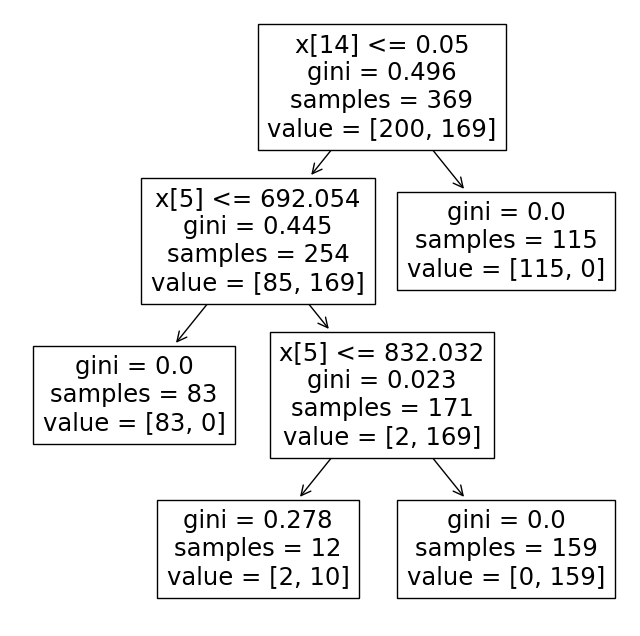

In [ ]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split= 0.1,
                                  min_samples_leaf = 10, random_state=123)
dtc.fit(X_train_c, y_train_c)
plt.figure(figsize=(8,8))
tree_plot = tree.plot_tree(dtc)

In [ ]:
####  methods ####

# children_left[i]: id of the left child of node i or -1 if leaf node
# children_right[i]: id of the right child of node i or -1 if leaf node
# feature[i]: feature used for splitting node i
# threshold[i]: threshold value at node i
# n_node_samples[i]: the number of of training samples reaching node i
# impurity[i]: the impurity at node i

n_nodes = dtc.tree_.node_count
children_left = dtc.tree_.children_left
children_right = dtc.tree_.children_right
feature = dtc.tree_.feature
threshold = dtc.tree_.threshold
impurity = dtc.tree_.impurity


We can interpret the tree construction rules:

In [ ]:
i = 3 # tree split node index
print(f"node= {i} is a split node with impurity of {impurity[i]:.3f}:\n go to node {children_left[i]} if X[:, {feature[i]}] <= {threshold[i]},\n else to node {children_right[i]}.")

node= 3 is a split node with impurity of 0.023:
 go to node 4 if X[:, 5] <= 832.0322265625,
 else to node 5.


A better visualization of graph:

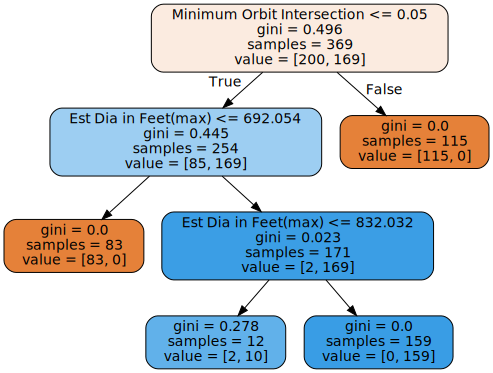

In [ ]:
import graphviz

dot_data = tree.export_graphviz(dtc, out_file=None,
                    feature_names=X_train_c.columns,
                    filled=True, rounded=True, fontname="calibri")
graph = graphviz.Source(dot_data)
graph

Predictions on test set:

In [ ]:
probs = dtc.predict_proba(X_test_c)
y_pred_c = dtc.predict(X_test_c)

acc_tree = dtc.score(X_test_c, y_test_c)
print(f"Accuracy with decision tree model: {acc_tree}")

confusion = metrics.confusion_matrix(y_test_c, y_pred_c)
print(f"Confusion matrix with decision tree model:\n {confusion}")

classification_report_d = metrics.classification_report(y_test_c, y_pred_c)
print(f"classification_report with Decision Tree:\n {classification_report_d}")

Accuracy with decision tree model: 1.0
Confusion matrix with decision tree model:
 [[42  0]
 [ 0 51]]
classification_report with Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        51

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



### Decision Trees for regression (forecasting):

In [ ]:
dtr = tree.DecisionTreeRegressor(criterion="squared_error", max_depth=4, min_samples_split= 0.1,
                                 min_samples_leaf = 10, random_state=123)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=0.1,
                      random_state=123)

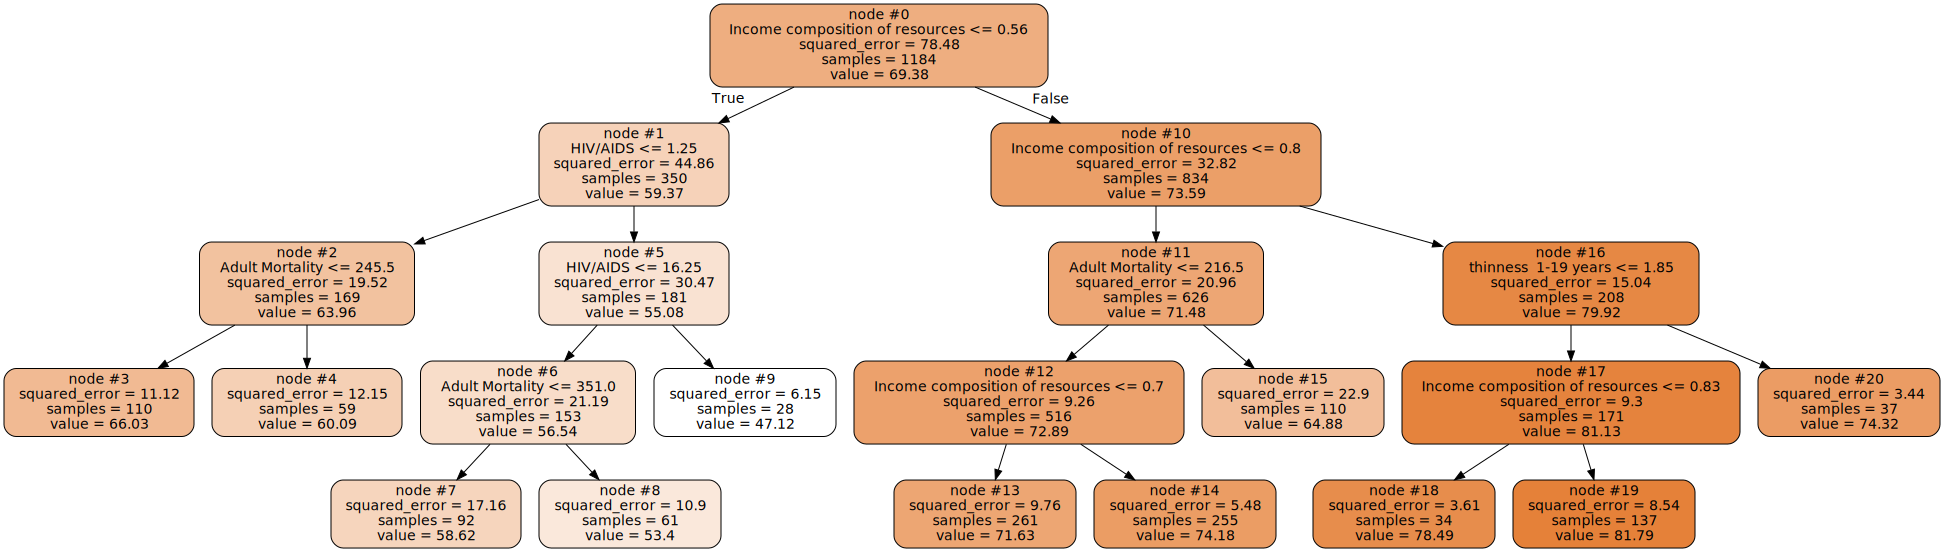

In [ ]:
dot_data = tree.export_graphviz(dtr, out_file=None, feature_names=X_train.columns,
                    node_ids= True, precision=2,
                    filled=True, rounded=True, fontname="calibri")


graph = graphviz.Source(dot_data)

import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('regression_tree.png')
graph


In [ ]:
y_pred = dtr.predict(X_test)

mse = metrics.mean_squared_error(y_pred, y_test)
print(f"MSE with decision tree model: {mse}")

mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE with decision tree model: {mape}")

MSE with decision tree model: 9.386691205184329
MAPE with decision tree model: 0.03425118268107095
